#### Data Exploration on four data sets provided: cold_start_test, consumption_train, meta, submission_format

In [77]:
import os
import numpy as np
import datetime
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5] 

from scipy.stats import mode

In [27]:
coldstart_df = pd.read_csv("Data/cold_start_test.csv")
consumption_df = pd.read_csv("Data/consumption_train.csv")
meta_df = pd.read_csv("Data/meta.csv")
format_df = pd.read_csv("Data/submission_format.csv")

In [28]:
coldstart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111984 entries, 0 to 111983
Data columns (total 5 columns):
Unnamed: 0     111984 non-null int64
series_id      111984 non-null int64
timestamp      111984 non-null object
consumption    111984 non-null float64
temperature    67068 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.3+ MB


In [29]:
coldstart_df.head()

,Unnamed: 0,series_id,timestamp,consumption,temperature
0,0,102781,2013-02-27 00:00:00,15295.740389,17.00
1,1,102781,2013-02-27 01:00:00,15163.209562,18.25
2,2,102781,2013-02-27 02:00:00,15022.264079,18.00
3,3,102781,2013-02-27 03:00:00,15370.420458,17.00
4,4,102781,2013-02-27 04:00:00,15303.103213,16.90


In [30]:
coldstart_df.describe()

,Unnamed: 0,series_id,consumption,temperature
count,111984.00000,111984.000000,1.119840e+05,67068.000000
mean,55991.50000,101881.195456,1.585893e+05,15.981019
std,32327.14061,1095.489531,5.282630e+05,7.796996
min,0.00000,100004.000000,0.000000e+00,-12.212500
25%,27995.75000,100876.000000,1.417107e+04,10.750000
50%,55991.50000,101939.500000,3.869147e+04,16.000000
75%,83987.25000,102920.000000,1.067592e+05,21.600000
max,111983.00000,103629.000000,5.366167e+06,42.000000


In [31]:
consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509376 entries, 0 to 509375
Data columns (total 5 columns):
Unnamed: 0     509376 non-null int64
series_id      509376 non-null int64
timestamp      509376 non-null object
consumption    509376 non-null float64
temperature    280687 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 19.4+ MB


In [32]:
consumption_df.head()

,Unnamed: 0,series_id,timestamp,consumption,temperature
0,0,103088,2014-12-24 00:00:00,101842.233424,NaN
1,1,103088,2014-12-24 01:00:00,105878.048906,NaN
2,2,103088,2014-12-24 02:00:00,91619.105008,NaN
3,3,103088,2014-12-24 03:00:00,94473.706203,NaN
4,4,103088,2014-12-24 04:00:00,96976.755526,NaN


In [33]:
consumption_df.describe()

,Unnamed: 0,series_id,consumption,temperature
count,509376.000000,509376.000000,5.093760e+05,280687.000000
mean,254687.500000,101851.234828,1.076238e+05,15.188679
std,147044.329696,1020.487674,1.626611e+05,8.987142
min,0.000000,100003.000000,0.000000e+00,-13.466667
25%,127343.750000,100998.000000,1.542092e+04,8.451190
50%,254687.500000,101884.500000,4.986205e+04,15.163333
75%,382031.250000,102697.000000,1.351661e+05,21.800000
max,509375.000000,103634.000000,2.085109e+06,44.350000


In [34]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 10 columns):
series_id               1383 non-null int64
surface                 1383 non-null object
base_temperature        1383 non-null object
monday_is_day_off       1383 non-null bool
tuesday_is_day_off      1383 non-null bool
wednesday_is_day_off    1383 non-null bool
thursday_is_day_off     1383 non-null bool
friday_is_day_off       1383 non-null bool
saturday_is_day_off     1383 non-null bool
sunday_is_day_off       1383 non-null bool
dtypes: bool(7), int64(1), object(2)
memory usage: 41.9+ KB


In [35]:
meta_df.head()

,series_id,surface,base_temperature,monday_is_day_off,tuesday_is_day_off,wednesday_is_day_off,thursday_is_day_off,friday_is_day_off,saturday_is_day_off,sunday_is_day_off
0,100003,x-large,low,False,False,False,False,False,True,True
1,100004,x-large,low,False,False,False,False,False,True,True
2,100006,x-small,low,False,False,False,False,False,True,True
3,100008,x-small,low,False,False,False,False,False,True,True
4,100010,x-small,low,False,False,False,False,False,True,True


In [36]:
meta_df['sunday_is_day_off'].value_counts()

True     1274
False     109
Name: sunday_is_day_off, dtype: int64

In [37]:
surface = meta_df.surface
print(np.unique(surface))
base = meta_df.base_temperature 
print(np.unique(base))

['large' 'medium' 'small' 'x-large' 'x-small' 'xx-large' 'xx-small']
['high' 'low']


In [38]:
format_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7529 entries, 0 to 7528
Data columns (total 6 columns):
pred_id              7529 non-null int64
series_id            7529 non-null int64
timestamp            7529 non-null object
temperature          4579 non-null float64
consumption          7529 non-null float64
prediction_window    7529 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 353.0+ KB


In [39]:
format_df.head()

,pred_id,series_id,timestamp,temperature,consumption,prediction_window
0,0,102781,2013-03-03 00:00:00,19.931250,0.0,daily
1,1,102781,2013-03-04 00:00:00,20.034375,0.0,daily
2,2,102781,2013-03-05 00:00:00,19.189583,0.0,daily
3,3,102781,2013-03-06 00:00:00,18.397917,0.0,daily
4,4,102781,2013-03-07 00:00:00,20.762500,0.0,daily


In [40]:
con_meta = pd.merge(consumption_df,
                 meta_df,
                 on='series_id')

In [41]:
con_meta.head()

,Unnamed: 0,series_id,timestamp,consumption,temperature,surface,base_temperature,monday_is_day_off,tuesday_is_day_off,wednesday_is_day_off,thursday_is_day_off,friday_is_day_off,saturday_is_day_off,sunday_is_day_off
0,0,103088,2014-12-24 00:00:00,101842.233424,NaN,x-small,low,False,False,False,False,False,True,True
1,1,103088,2014-12-24 01:00:00,105878.048906,NaN,x-small,low,False,False,False,False,False,True,True
2,2,103088,2014-12-24 02:00:00,91619.105008,NaN,x-small,low,False,False,False,False,False,True,True
3,3,103088,2014-12-24 03:00:00,94473.706203,NaN,x-small,low,False,False,False,False,False,True,True
4,4,103088,2014-12-24 04:00:00,96976.755526,NaN,x-small,low,False,False,False,False,False,True,True


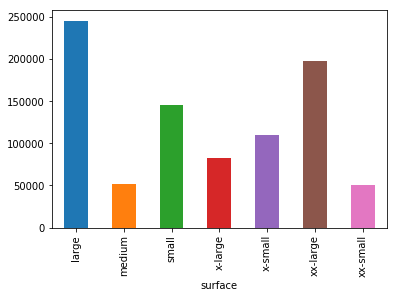

In [42]:
con_meta.groupby('surface').consumption.mean().plot(kind='bar')

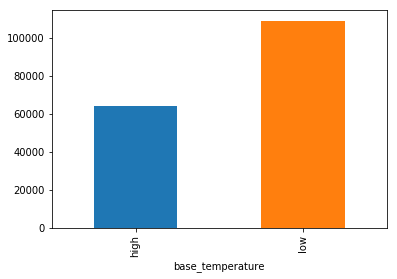

In [43]:
con_meta.groupby('base_temperature').consumption.mean().plot(kind='bar')

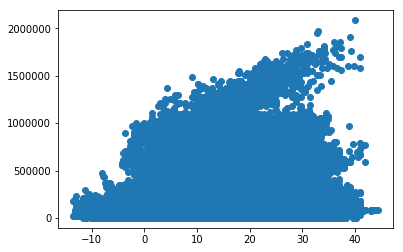

In [44]:
plt.scatter( consumption_df.temperature, consumption_df.consumption)

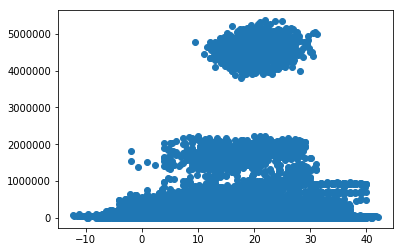

In [45]:
plt.scatter( coldstart_df.temperature, coldstart_df.consumption)

In [46]:
np.unique(format_df.prediction_window)

array(['daily', 'hourly', 'weekly'], dtype=object)

In [49]:
coldstart_df['timestamp'] = pd.to_datetime(coldstart_df['timestamp'])

Text(0, 0.5, 'Consumption')

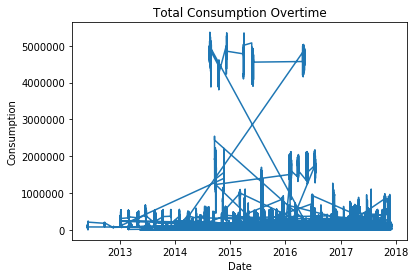

In [53]:
plt.plot(coldstart_df['timestamp'], coldstart_df['consumption'])
plt.title("Total Consumption Overtime")
plt.xlabel("Date")
plt.ylabel("Consumption")

In [51]:
consumption_df['timestamp'] = pd.to_datetime(consumption_df['timestamp'])

Text(0, 0.5, 'Consumption')

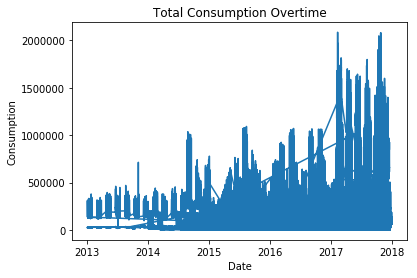

In [54]:
plt.plot(consumption_df['timestamp'], consumption_df['consumption'])
plt.title("Total Consumption Overtime")
plt.xlabel("Date")
plt.ylabel("Consumption")

In [55]:
con_meta['timestamp'] = pd.to_datetime(con_meta['timestamp'])

In [61]:
con_meta['consumption'] = con_meta.consumption.astype('category')
con_meta['temperature'] = con_meta.temperature.astype('category')
con_meta['surface'] = con_meta.surface.astype('category')

KeyError: 0

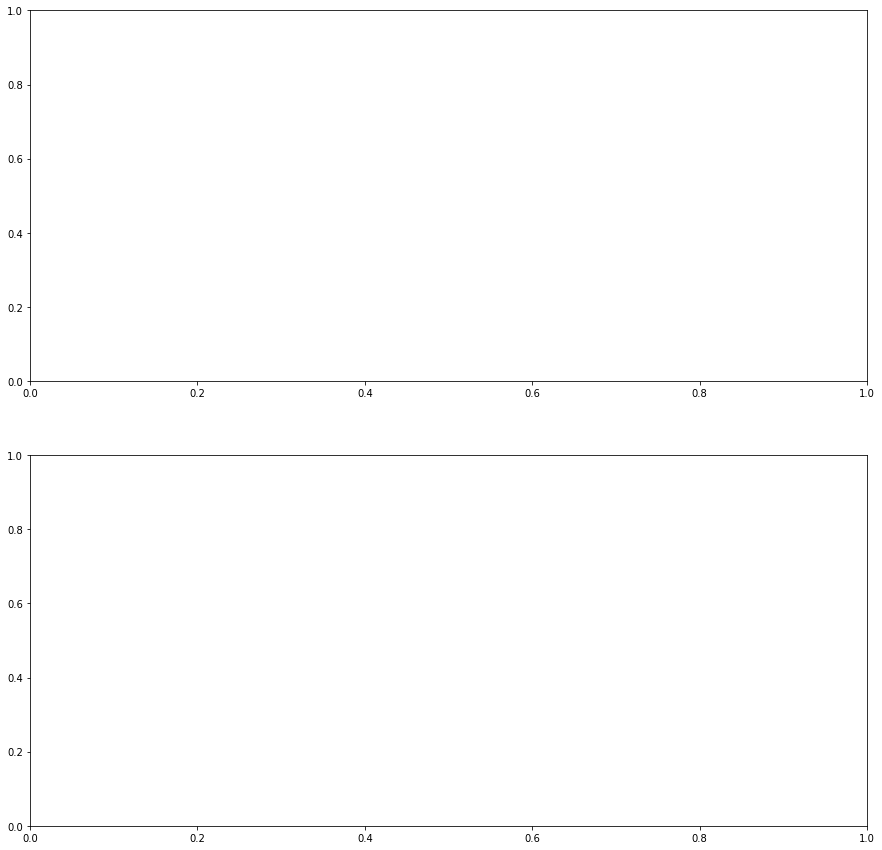

In [64]:
col_list = ['consumption', 'temperature']

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(15,15))
for i in range(len(col_list)): 
    ax[i].plot(con_meta[col_list[i]], label=con_meta[i])
    ax[i].set_title(con_meta[i])
plt.tight_layout()
plt.show()

In [78]:
mode(coldstart_df['series_id'])

ModeResult(mode=array([100096], dtype=int64), count=array([336]))